In [9]:
# Importing Packages
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import toolsar as ar
from timeit import default_timer as timer

ar.printhash()


 ##### 



In [2]:
def AdaptiveOrbit_RK4(func,state, tf, dt, d_ha, d_do, dtmin, tol):
    arr_state=[state]
    lena=len(arr_state[0])
    #print(lena)
    t=0
    arr_t=[]
    i=0
    A=[0,2/9,1/3,3/4,1,5/6]
    B=[[],[2/9],[1/12,1/4],[69/128,-243/128]]
    while t < tf and dt < tf:
        arr_t.append(t)
        #print('S0:',arr_state[i])
        
        #for single step
        ####################################################################
        state_vec = arr_state[i]
        
        f1=func(state_vec,t)
        k1=[]
        for j in range(lena):
            f0=f1[j]
            k1.append(f0)
        k2=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k1[j]*dt/2
        f2=func(state_vec,t+ dt/2)
        for j in range(lena):  
            f0=f2[j]
            k2.append(f0)
        k3=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k2[j]*dt/2
        f3=func(state_vec,t+ dt/2)
        for j in range(lena):
            f0=f3[j]
            k3.append(f0)
        k4=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k3[j]*dt
        f4=func(state_vec,t +dt)
        for j in range(lena):
            f0=f4[j]
            k4.append(f0)
        
        #for half step
        ####################################################################
        state_vec = arr_state[i]
        
        f1=func(state_vec,t)
        for j in range(lena):
            f0=f1[j]
            k1.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k1[j+lena]*dt/4
        
        f2=func(state_vec,t+ dt/4)
        for j in range(lena):  
            f0=f2[j]
            k2.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k2[j+lena]*dt/4
        
        f3=func(state_vec,t+ dt/4)
        for j in range(lena):
            f0=f3[j]
            k3.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k3[j+lena]*dt/2
        
        f4=func(state_vec,t +dt/2)
        for j in range(lena):
            f0=f4[j]
            k4.append(f0)
        
        #for double step
        ####################################################################
        state_vec = arr_state[i]
        
        f1=func(state_vec,t)
        for j in range(lena):
            f0=f1[j]
            k1.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k1[j+lena+lena]*dt
        
        f2=func(state_vec,t+ 2*dt)
        for j in range(lena):  
            f0=f2[j]
            k2.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k2[j+lena+lena]*dt
        
        f3=func(state_vec,t+ 2*dt)
        for j in range(lena):
            f0=f3[j]
            k3.append(f0)
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k3[j+lena+lena]*2*dt
        
        f4=func(state_vec,t + 2*dt)
        for j in range(lena):
            f0=f4[j]
            k4.append(f0)
        
        
        
        step_x=[]
        step_x_half=[]
        step_x_double=[]
        
        #print(k1)
        #print(k2)
        #print(k3)
        #print(k4)
        
        for j in range(lena):
            step_x.append((k1[j]+ 2*k2[j] + 2*k3[j] + k4[j])*dt/6)
            step_x_half.append((k1[j+lena]+ 2*k2[j+lena] + 2*k3[j+lena] + k4[j+lena])*dt/12)
            step_x_double.append((k1[j+lena+lena]+ 2*k2[j+lena+lena] + 2*k3[j+lena+lena] + k4[j+lena+lena])*dt/3)
        
        count_half=0
        count_double=0
        #print('steps')
        #print(step_x)
        #print(step_x_half)
        #print(step_x_double)
        for k in range(lena):
            if (abs(step_x[k]) < tol[k]): # Minimum Fixed Step Size for small values of x.
                if (dt != dtmin):
                    #print("New step size min",dtmin)
                    dt = dtmin
                new_x = step_x
            else:
                if (abs(step_x[k]) > tol[k]) and abs(step_x[k] - step_x_half[k])/abs(step_x[k]) > d_ha:
                    count_half += 1
                    #print('c1')
                if (abs(step_x[k]) > tol[k]) and abs(step_x[k] - step_x_double[k])/abs(step_x[k]) < d_do:
                    count_double += 1
                    #print('c2')
                else:
                    new_x = step_x
        
        if (count_half >= lena-1 and count_double <= lena-1):
            dt = dt/2 # Larger Error ; Step Size Halved
            #print("New step size half",dt)
            new_x = step_x_half
        else:
            new_x =  step_x
        
        if (count_double >= lena-1 and count_half <= lena-1):
            dt = dt*2 # Smoother Function ; Step Size Doubled
            #print("New step size double",dt)
            new_x = step_x_double
        else:
            new_x =  step_x
        
        state_new=[]
        #print('new step',new_x)
        for k in range(len(arr_state[0])):
            state_new.append(arr_state[i][k] + new_x[k])
        
        i=i+1
        #print('>',new_x)
        #print('>>>',dt,state_new)
        arr_state.append(state_new)
        t=t+dt
        
        if i > 0:
            for t in range(0,len(arr_state)-1):
                if arr_state[i] == arr_state[t]:
                    print('Orbit Completed:',arr_state[i],'\n',arr_state[t])
                    break
    
    print('No. of steps',len(arr_state))
    #if dt> tf:
        #print('dt increased')
    return arr_state,arr_t

ar.printhash()


 ##### 



In [3]:
def Orbit_RK4(func,state, tf, dt):
    arr_state=[state]
    lena=len(arr_state[0])
    #print(lena)
    t=0
    arr_t=[]
    i=0
    while t < tf and dt < tf:
        arr_t.append(t)
        #print('S0:',arr_state[i])
        
        #for single step
        ####################################################################
        state_vec = arr_state[i]
        
        f1=func(state_vec,t)
        k1=[]
        for j in range(lena):
            f0=f1[j]
            k1.append(f0)
        k2=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k1[j]*dt/2
        f2=func(state_vec,t+ dt/2)
        for j in range(lena):  
            f0=f2[j]
            k2.append(f0)
        k3=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k2[j]*dt/2
        f3=func(state_vec,t+ dt/2)
        for j in range(lena):
            f0=f3[j]
            k3.append(f0)
        k4=[]
        for j in range(lena):
            state_vec[j] = arr_state[i][j] + k3[j]*dt
        f4=func(state_vec,t +dt)
        for j in range(lena):
            f0=f4[j]
            k4.append(f0)
        
        
        
        step_x=[]
        
        #print(k1)
        #print(k2)
        #print(k3)
        #print(k4)
        
        for j in range(lena):
            step_x.append((k1[j]+ 2*k2[j] + 2*k3[j] + k4[j])*dt/6)
        
        state_new=[]
        #print('new step',new_x)
        for k in range(len(arr_state[0])):
            state_new.append(arr_state[i][k] + step_x[k])
        
        i=i+1
        #print('>',new_x)
        #print('>>>',dt,state_new)
        arr_state.append(state_new)
        t=t+dt
    
    print('No. of steps',len(arr_state))
    #if dt> tf:
        #print('dt increased')
    return arr_state,arr_t

ar.printhash()


 ##### 



In [4]:
# Earth Model
def state_dt(state, t):
    mu = 3.986004418E+05  # Earth's gravitational parameter [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    dxdt = state[3]
    dydt = state[4]
    dzdt = state[5]
    d2xdt2 = -mu*x / (((x**2) + (y**2) + (z**2))**(3 / 2))
    d2ydt2 = -mu*y / (((x**2) + (y**2) + (z**2))**(3 / 2))
    d2zdt2 = -mu*z / (((x**2) + (y**2) + (z**2))**(3 / 2))
    state_dt = [dxdt, dydt, dzdt, d2xdt2, d2ydt2, d2zdt2]
    return state_dt

# Initial Conditions

X_0 = -3000  # [km]
Y_0 = -5500  # [km]
Z_0 = 3400  # [km]
VX_0 = 7.5  # [km/s]
VY_0 = 0.0  # [km/s]
VZ_0 = 4.0  # [km/s]

state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]

#print('Initial State:',state_0)

X0 = 1e-1  # [km]
Y0 = 1e-1  # [km]
Z0 = 1e-1  # [km]
VX0 = 1e-5  # [km/s]
VY0 = 1e-5 # [km/s]
VZ0 = 1e-5  # [km/s]
tol_vec = [X0, Y0, Z0, VX0, VY0, VZ0]

d_ha = 0.01
d_do = 0.01

tf=1e4
dt=10

Initial State: [-3000, -5500, 3400, 7.5, 0.0, 4.0]


No. of steps 10002
Elapsed Time: 5.868341900059022 s


Final State: [4410.075818622404, 21816.23509961379, -17480.900563050058, -2.388086793141573, 0.3391194539729177, -1.5819367023781548]


<IPython.core.display.Javascript object>


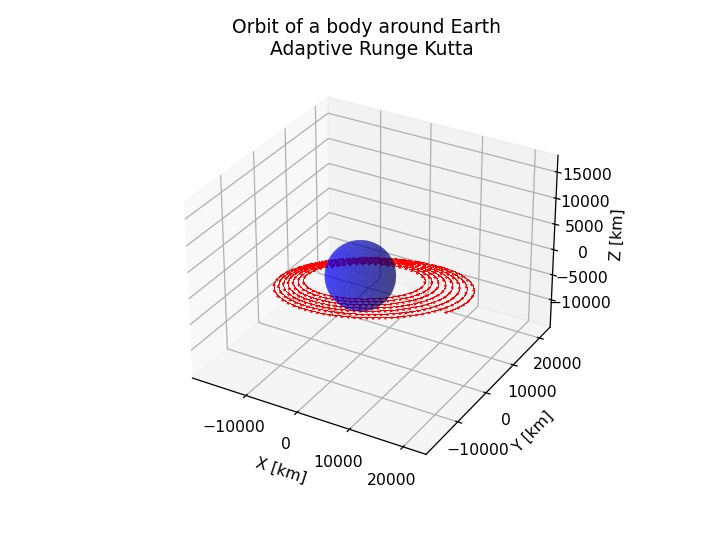

In [5]:
print('Initial State:',state_0)
print('\n')
start = timer()
sol,artime = AdaptiveOrbit_RK4(state_dt, state_0, tf, dt, d_ha, d_do, dt, tol_vec)
end = timer()
print('Elapsed Time:',end - start,'s')
print('\n')
print('Final State:',sol[len(sol)-1])
#Adaptive_RK(func,state, tf, dt, d_half, d_double, dtmin, tol)
#print(sol)
X_Sat=[]
Y_Sat=[]
Z_Sat=[]
for i in range(0,len(sol)):
    X_Sat.append(sol[i][0]) # X-coord [km] of satellite over time interval 
    Y_Sat.append(sol[i][1]) # Y-coord [km] of satellite over time interval
    Z_Sat.append(sol[i][2]) # Z-coord [km] of satellite over time interval

#print(X_Sat[len(sol)-1],Y_Sat[len(sol)-1],Z_Sat[len(sol)-1])

# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6000  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.5)
ax.plot(X_Sat, Y_Sat, Z_Sat,'r,:')
#ax.plot3D(X_Sat2, Y_Sat2, Z_Sat2,'bo--')
plt.title('Orbit of a body around Earth \n Adaptive Runge Kutta')
# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)

ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')
plt.show()

Initial State: [-2468.4355356025667, -5487.452941783275, 3672.0946311179723, 7.71709771375295, 0.4297413703033259, 3.7251114743318836]


No. of steps 1001
Elapsed Time: 0.031155000091530383 s


Final State: [11299.933096039045, 6776.867028536219, -134.1572232060347, 0.18186439164547907, 4.339560561715887, -3.8480607138944376]


<IPython.core.display.Javascript object>


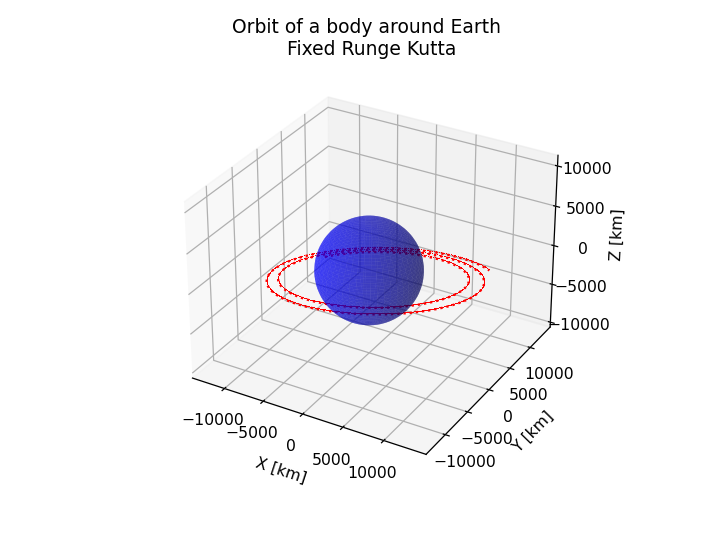

In [6]:
print('Initial State:',state_0)
print('\n')
start = timer()
sol,artime = Orbit_RK4(state_dt, state_0, tf, dt)
end = timer()
print('Elapsed Time:',end - start,'s')
print('\n')
print('Final State:',sol[len(sol)-1])
#Adaptive_RK(func,state, tf, dt, d_half, d_double, dtmin, tol)
#print(sol)
X_Sat=[]
Y_Sat=[]
Z_Sat=[]
for i in range(0,len(sol)):
    X_Sat.append(sol[i][0]) # X-coord [km] of satellite over time interval 
    Y_Sat.append(sol[i][1]) # Y-coord [km] of satellite over time interval
    Z_Sat.append(sol[i][2]) # Z-coord [km] of satellite over time interval

#print(X_Sat[len(sol)-1],Y_Sat[len(sol)-1],Z_Sat[len(sol)-1])

# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6000  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.5)
ax.plot(X_Sat, Y_Sat, Z_Sat,'r,:')
#ax.plot3D(X_Sat2, Y_Sat2, Z_Sat2,'bo--')
plt.title('Orbit of a body around Earth \n Fixed Runge Kutta')
# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)

ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')
plt.show()

In [7]:
#Psuedo Code RK4

    #Input Initial State of Body: state = [X, Y, Z, VX, VY, VZ]
    #Define Function: func = d(state)/dt

    #Calculate Adaptive RK4 Orbit:
        #Input: Function, State, Time, Timestep, Ratio_Half, Ratio_Double, Minimum Step Size

        #Working:
        #While time < final time:
            #Calculate Single, Half and Double Step for RK4 for prev or initial state
            #Check for Minimum Step Size for small values of y_i
            #Calculate relative error for steps
            #Acccording to relative error fix step size
                #If rel_err at half step > Ratio_Half
                    #Error is too large ; Smaller steps needed
                #If rel_err at double step < Ratio_Double
                    #Error is too small; Smoother function ; Larger steps needed
            #Calculate new state
                #Append state

        #Output: Final Array of States


In [ ]:
#Psuedo Code Unused RK

    #Input Initial State of Body: state = [X, Y, Z, VX, VY, VZ]
    #Define Function: func = d(state)/dt

    #Define RK4 Step using Cash-Karp parameters:
        #Input: Function, State, Time, Timestep
        #Output: New State, New State*, New Time
        
    #Calculate Adaptive RK4 Orbit:
        #Input: Function, State, Time, Timestep

        #Working:
        #While time < final time:
            #Calculate the RK Step for prev or initial state
            #Error Calculation as follows:
                #error = sqrt((x-x*)^2 + (y-y*)^2 + (z-z*)^2)
            #Calculate rho as follows:
                #rho = (tol*dt)/(error)
            #If rho > 1
                #Error is small; step size can increase; append the acceptable state
            #New step size as follows:
                #dt = dt*(rho)**0.2
                    #If rho > 1; dt increases
                    #If rho < 1; dt decreases

        #Output: Final Array of States


Initial State: [0.426523126531974, 0.8899800225851189, -4.5836254825918985e-06, -5.767434200051764, 2.68954449937976, 6.931144381737007e-07]


Elapsed Time: 0.13451020000502467 s
No. of steps: 1151


Final State: [1.0489152349061621, -5.978825841006099, 1.938528588071139e-07, 2.6830788862766908, -0.13568178745325332, -6.955453755249572e-08]


<IPython.core.display.Javascript object>


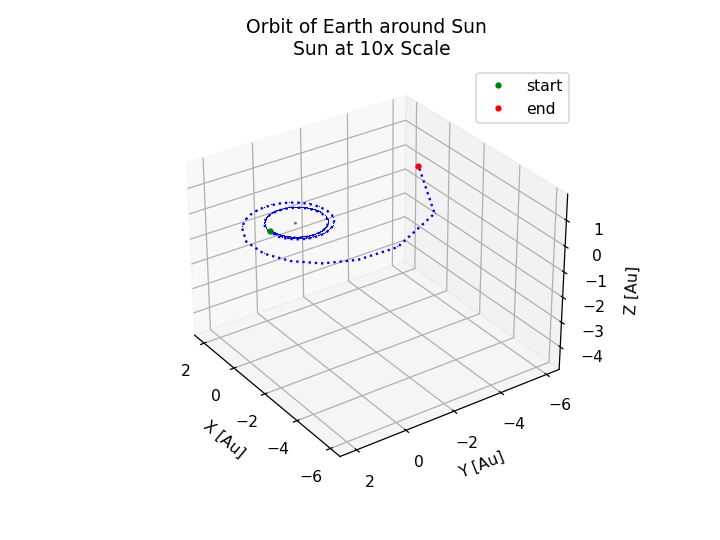

In [12]:
# UNUSED RK METHOD

def RK4_Step(func, state, t, dt):

    lena=int(len(state))
    
    #print(lena)
    
    state_vec=[]
    for j in range(lena):
        state_vec.append(state[j])
    
    f1=func(state_vec,t)
    k1=[]
    for j in range(lena):
        f0=f1[j]
        k1.append(f0)
    
    #print(dt,state_vec)
    k2=[]
    state_vec = state
    for j in range(lena):
        state_vec[j] = state[j] + k1[j]*dt/5
        
    f2=func(state_vec,t + dt/5)
    for j in range(lena):  
        f0=f2[j]
        k2.append(f0)
        
    k3=[]
    state_vec = state
    for j in range(lena):
        state_vec[j] = state[j] + k1[j]*dt*3/40 + k2[j]*dt*9/40
        
    f3=func(state_vec,t + dt*3/10)
    for j in range(lena):
        f0=f3[j]
        k3.append(f0)
        
    k4=[]
    state_vec = state
    for j in range(lena):
        state_vec[j] = state[j] + k1[j]*dt*3/10 - k2[j]*dt*9/10 + k3[j]*dt*6/5
        
    f4=func(state_vec,t + dt*3/5)
    for j in range(lena):
        f0=f4[j]
        k4.append(f0)
        
    k5=[]
    state_vec = state
    for j in range(lena):
        state_vec[j] = state[j] - k1[j]*dt*11/54 + k2[j]*dt*5/2 - k3[j]*dt*70/27 + k4[j]*dt*35/27
        
    f5=func(state_vec,t + dt)
    for j in range(lena):
        f0=f5[j]
        k5.append(f0)
        
    k6=[]
    state_vec = state
    for j in range(lena):
        state_vec[j] = state[j] + k1[j]*dt*1631/55296 + k2[j]*dt*175/512 + k3[j]*dt*575/13824 + k4[j]*dt*44275/110592 + k5[j]*dt*253/4096
        
    f6=func(state_vec,t + dt)
    for j in range(lena):
        f0=f6[j]
        k6.append(f0)
        
    state_new=[]
    state_error=[]
    for k in range(lena):
        state_new.append(state[k] + ((37*k1[j]/378 + 250*k3[j]/621 + 125*k4[j]/594 + 512*k6[j]/1771)*dt))
        state_error.append(state[k] + ((2825*k1[j]/27648 + 18575*k3[j]/48384 + 13525*k4[j]/55296 + 277*k5[j]/14336 + k6[j]/4)*dt))
    
    t=t+dt

    return state_new, state_error, t

def AOrbit_RK4(func, state_0, t_0, t_f, dt_0):
    t=t_0
    dt=dt_0
    arr_state=[state_0]
    lena=int(len(state_0))
    delta=6.68457434e-9 # [AU] given the accuracy is of order 1 km for 1 hour unit of step
    #print(state_0)
    while t <= t_f:
        #print(arr_state[len(arr_state)-1])
        
        #normal step 1
        state_m0, state_m0e, t_m = RK4_Step(func, arr_state[len(arr_state)-1], t, dt)
        
        #print(state_m0,'\n',state_m0e)
        
        err_abs = 0
        for j in range(0,int(lena/2)):
            err_abs += ((state_m0[j] - state_m0e[j]))**2
        
        #print(err_dn0)
        try:
            rho_d = (delta*dt)/(math.sqrt(err_abs))
            
        except ZeroDivisionError:
            rho_d = (delta*dt)/1e-25
        
        #print('Rho:',rho_d,'\n dt*delta:',dt*delta,'\n Error:',math.sqrt(err_abs))
        #print('\n')    
        if rho_d > 1:
            state_0, state_e, t = RK4_Step(func, arr_state[len(arr_state)-1], t, dt)
            state_0 = state_0
            arr_state.append(state_0)
            #print('>>>','dt:',dt,'Time:',t,'Rho:',rho_d,'\n State:',state_0,'\n')
            #if state_0 == arr_state[len(arr_state)-2]:
                #print('Orbit Complete.')
                #print(state_0,arr_state[len(arr_state)-2])
                #return arr_state
            
        dt = 0.9*dt*(rho_d**(1/5))
        #print(t,dt)
    return arr_state


# Sun-Planet Model
def dstatedt3d(state, t):
    mu = 39.5  # Sun's gravitational parameter [AU^3/year^2] = G * M_sun
    x = state[0]
    y = state[1]
    z = state[2]
    dxdt = state[3]
    dydt = state[4]
    dzdt = state[5]
    d2xdt2 = -mu*x / (((x**2) + (y**2) + (z**2))**(3 / 2))
    d2ydt2 = -mu*y / (((x**2) + (y**2) + (z**2))**(3 / 2))
    d2zdt2 = -mu*z / (((x**2) + (y**2) + (z**2))**(3 / 2))
    dstate_dt = [dxdt, dydt, dzdt, d2xdt2, d2ydt2, d2zdt2]
    return dstate_dt

# Initial Conditions taken from Horizons Web Application @JPL, NASA for Earth and coverted to appropriate units
X = 0.42652312653197399506   # [AU]
Y = 0.88998002258511887952   # [AU]
Z =-4.583625482591898516e-6  # [AU]
VX=-5.7674342000517642148    # [AU/year]
VY= 2.6895444993797599231    # [AU/year]
VZ= 6.931144381737007141e-7  # [AU/year]
state0 = [X, Y, Z, VX, VY, VZ]


t_0 = 0
t_f = 1       # [years]
dt_0 = 1e-2    # [years]

print('Initial State:',state0)
print('\n')
start = timer()
sol = AOrbit_RK4(dstatedt3d, state0, t_0, t_f, dt_0)
end = timer()
print('Elapsed Time:',end - start,'s')
print('No. of steps:',len(sol))
print('\n')
print('Final State:',sol[len(sol)-1])


X_Sat=[]
Y_Sat=[]
Z_Sat=[]
for i in range(0,len(sol)):
    X_Sat.append(sol[i][0]) # X-coord [AU] of Earth over time interval 
    Y_Sat.append(sol[i][1]) # Y-coord [AU] of Earth over time interval
    Z_Sat.append(sol[i][2]) # Z-coord [AU] of Earth over time interval

# Setting up Spherical Sun to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Sun = 0.05  # 10x Average radius of Sun [AU]
X_Sun = r_Sun * np.cos(phi) * np.sin(theta)
Y_Sun = r_Sun * np.sin(phi) * np.sin(theta)
Z_Sun = r_Sun * np.cos(theta)

# Plotting Sun and Orbit of Planet
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Sun, Y_Sun, Z_Sun, color='red', alpha=0.3)
ax.plot(X_Sat, Y_Sat, Z_Sat,'b,:')
ax.plot(sol[0][0], sol[0][1], sol[0][2],'g.',label='start')
ax.plot(sol[len(sol)-1][0], sol[len(sol)-1][1], sol[len(sol)-1][2],'r.',label='end')
plt.legend()
plt.title('Orbit of Earth around Sun \n Sun at 10x Scale')
ax.view_init(30, 145)

# Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(),ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)

ax.set_xlabel('X [Au]')
ax.set_ylabel('Y [Au]')
ax.set_zlabel('Z [Au]')
plt.show()